# Problem Statement

The dataset is based on Stack Overflow's survey results which describes developers favorite languages, coding habits and workstyle preferences.

I have divided my analysis into two parts. In the first part, I will examine **2017** survey results to answer 4 questions.<br/>
**1)**	What is the percentage of respondents who use R vs Python? Specifically, what is the percentage of R and Python users only for Data Scientists? I feel that comparing R and Python on all respondents would be unfair, since Python is a general-purpose programming language, whereas R has niche fan base among Researchers, Statisticians and Data Scientists alike. For example, most of my experience in using Python is dealing with dataframes in pandas, whereas the software engineers in my company usually use Python tasks like building data pipelines or deploying features on AWS lambda.

**2)**	What are the most used languages by Data Scientists? R and Python are popular for tasks like data wrangling, NLP and Machine Learning, but I also expect SQL to be on the top of the list since querying data from multiple tables is essential in any organization. Beyond that, it also wouldn’t be surprising to see languages like Scala, Java or C++ since they are typically utilized for deploying Machine Learning models in production.

**3)**	What is the education background among Data Scientists? I expect to see a higher percentage of advanced degrees compared to peers from other professions.

**4)**	What is the median salary for Data Scientists? 

In the second part, I will inspect data from **2011-2017** to answer the following 4 questions:<br/>
**5**)	What is the percentage increase in respondents who call themselves Data Scientists? There has been an increased demand for professionals who can generate insights from data in the last 5 years and I would like to see if this trend is captured.

**6**)	What is the percentage increase in R and Python users for Data Scientists?

**7**)	What is the trend among Data Scientists who have a Bachelor’s Vs Master's Vs PhD? To keep up with the demand, many universities have begun offering Masters program in Data Science. Do we see an increase in respondents who have a Master's degree?

**8**)	What is the percentage increase in median salary for Data Scientists? 



In [19]:
# Importing Libraries
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division

In [2]:
# Read 2017 survey results
df2017 = pd.read_csv('/Users/mohitravi/Desktop/developer_survey_2017/survey_results_public.csv')

In [147]:
df2017.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,RUser,PythonUser,Both,IsDataScientist
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,False,False,False,False
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,False,True,False,False
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,False,True,False,False


In [4]:
df2017.shape

(51392, 154)

In [40]:
# Create functions for respondants who use R, Python or Both R and Python
def RUser(df):
    return(df.apply(lambda x: 'R' in str(x).split('; ')))

def PythonUser(df):
    return(df.apply(lambda x: 'Python' in str(x).split('; ')))

def RandPython(df):
    return(df.apply(lambda x: True if ('R' in str(x).split('; ') and 
                                                  'Python' in str(x).split('; ')) else False))

# **Question - 1**

In [41]:
#Compare R, Python or Both R and Python for all Respondants
df2017['RUser'] = RUser(df2017['HaveWorkedLanguage'])
df2017['PythonUser'] = PythonUser(df2017['HaveWorkedLanguage'])
df2017['Both'] = RandPython(df2017['HaveWorkedLanguage'])

print 'Respondants who use R:', df2017['RUser'].sum()
print 'Respondants who use Python:', df2017['PythonUser'].sum()
print 'Respondants who use both R and Python:', df2017['Both'].sum()
print 'Total Respondants who use atleast one langauge:', df2017['HaveWorkedLanguage'].notnull().sum()

Respondants who use R: 1634
Respondants who use Python: 11704
Respondants who use both R and Python: 1026
Total Respondants who use atleast one langauge: 36625


Let X be respondants who use R, Y be respondants who use Python. Then X∩Y are respondants who use both R and Python.<br/>
From Set theory, X∪Y = X + Y - X∩Y.<br/>
Therefore, Respondants who use only R = X - X∩Y (To be specific, this means respondants who use R and/or other languages but not Python. But for simplicity, we will call it - 'Respondants who use only R').<br/>
Respondants who use only Python = Y - X∩Y

In [55]:
print '% of all Respondants who use only R:',
(df2017['RUser'].sum() - df2017['Both'].sum()) / (df2017['HaveWorkedLanguage'].notnull().sum()) * 100
print '% of all Respondants who use only Python:', 
(df2017['PythonUser'].sum() - df2017['Both'].sum()) / (df2017['HaveWorkedLanguage'].notnull().sum()) * 100
print '% of all Respondants who use both R and Python:', 
(df2017['Both'].sum()) / (df2017['HaveWorkedLanguage'].notnull().sum()) * 100

% of all Respondants who use only R: 1.66006825939
% of all Respondants who use only Python: 29.1549488055
% of all Respondants who use both R and Python: 2.80136518771


In [92]:
# List of all columns 
list(df2017.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

Let's do the same comparison for Data Scientists. There are two columns - 'DeveloperType' and 'NonDeveloperType' which contains information about Data Scientists. To be more broad based, I will consider professionals who term themselves as 'Data scientist', 'Machine learning specialist', 'Developer with a statistics or mathematics background' and 'Analyst or consultant' to be one and the same.

In [101]:
# Create function for Data Scientist
# Function for DeveloperType
def DataScientist1(df):
    return(df.apply(lambda x: True if ('Data scientist' in str(x).split('; ') or 
                                             'Machine learning specialist' in str(x).split('; ') or 
                                             'Developer with a statistics or mathematics background' 
                                             in str(x).split('; ')) else False))
# Function for NonDeveloperType
def DataScientist2(df):
    return(df.apply(lambda x: True if ('Data scientist' in str(x).split('; ') or 
                                             'Analyst or consultant' 
                                             in str(x).split('; ')) else False))

In [109]:
df2017['IsDataScientist'] = (DataScientist1(df2017['DeveloperType'])) | (DataScientist2(df2017['NonDeveloperType']))

In [112]:
print 'Total number of Respondants who are Data Scientists:', df2017['IsDataScientist'].value_counts()[1]

Total number of Respondants who are Data Scientists: 8876


In [113]:
# Perform the same operations for Respondants who are Data Scientists
dfDataScientist2017 = df2017[df2017['IsDataScientist'] == True]

In [116]:
print '% of Data Scientists who use only R:',
    (dfDataScientist2017['RUser'].sum() - dfDataScientist2017['Both'].sum()) / 
    (dfDataScientist2017['HaveWorkedLanguage'].notnull().sum()) * 100
print '% of Data Scientists who use only Python:', 
    (dfDataScientist2017['PythonUser'].sum() - dfDataScientist2017['Both'].sum()) / 
    (dfDataScientist2017['HaveWorkedLanguage'].notnull().sum()) * 100
print '% of Data Scientists who use both R and Python:', 
    (dfDataScientist2017['Both'].sum()) / (dfDataScientist2017['HaveWorkedLanguage'].notnull().sum()) * 100

% of Data Scientists who use only R: 4.85332514207
% of Data Scientists who use only Python: 37.4289663646
% of Data Scientists who use both R and Python: 9.24589156812


I expected to see more percentage of Data Scientists who use R compared to all respondants, but the % increase is negligible. It would be premature to conclude that Python is heavily preferred over R by Data Scientists, since it could be possible that the people who responded to this survey tend to generally prefer Python more, which is a classic case of selection bias.

If we look at the latest Kdnuggets polls, the % share of R and Python among Data Scientists is almost equal.<br\>
https://www.kdnuggets.com/2017/05/poll-analytics-data-science-machine-learning-software-leaders.html

# ** Question - 2 **

In [178]:
# Find count of all Languages used by Data Scientists
def UniqueCount(df):
    flattenCount = [x for a in [str(x).split("; ") for x in df] for x in a]
    flattenCount = pd.Series(flattenCount)
    flattenCount.replace('nan', np.NaN, inplace = True)
    return flattenCount

In [118]:
UniqueCount(dfDataScientist2017['HaveWorkedLanguage']).value_counts()

SQL               3677
JavaScript        3521
Python            3039
Java              2583
C#                2076
C++               1848
PHP               1596
C                 1430
R                  918
Matlab             570
Ruby               553
VBA                546
TypeScript         498
VB.NET             459
Scala              452
Perl               448
Objective-C        397
Assembly           386
Swift              357
Go                 343
Visual Basic 6     259
Groovy             243
Lua                229
CoffeeScript       212
Haskell            174
F#                 122
Clojure            115
Rust                99
Smalltalk           97
Common Lisp         92
Erlang              71
Elixir              68
Julia               64
Dart                40
Hack                30
dtype: int64

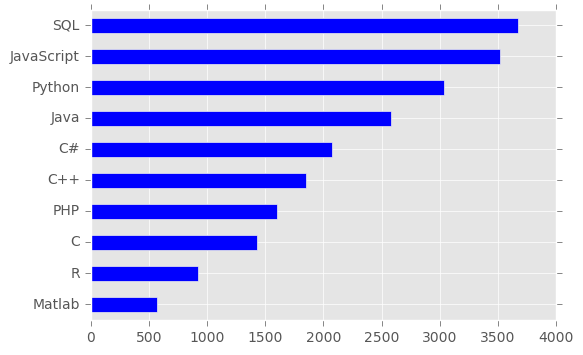

In [119]:
# Plot 10 most used languages
UniqueCount(dfDataScientist2017['HaveWorkedLanguage']).value_counts()[0:10].iloc[::-1].plot(kind = 'barh', color = 'b')
plt.style.use('ggplot')

No surprises here! SQL is the most popular language among Data Scientists.<br\>
Besides SQL and Python, JavaScript and Java are also pretty popular.

# ** Question - 3 **

In [120]:
# All Respondants
df2017['FormalEducation'].value_counts(normalize = True) * 100

Bachelor's degree                                                    42.047400
Master's degree                                                      21.678471
Some college/university study without earning a bachelor's degree    15.817637
Secondary school                                                     11.495953
Doctoral degree                                                       2.545143
I prefer not to answer                                                2.157923
Primary/elementary school                                             2.037282
Professional degree                                                   1.391267
I never completed any formal education                                0.828923
Name: FormalEducation, dtype: float64

In [121]:
# Only Data Scientists
dfDataScientist2017['FormalEducation'].value_counts(normalize = True) * 100

Bachelor's degree                                                    39.984227
Master's degree                                                      31.478143
Some college/university study without earning a bachelor's degree    12.314105
Doctoral degree                                                       7.559712
Secondary school                                                      4.337539
Professional degree                                                   1.644885
I prefer not to answer                                                1.205498
I never completed any formal education                                0.946372
Primary/elementary school                                             0.529518
Name: FormalEducation, dtype: float64

Data Scientists have a higher percentage of Master's and PhD's compared to all developers.

# ** Question - 4 **

In [122]:
# Compare Salary stats per country for Data Scientist.
dfDataScientist2017.groupby('Country')['Salary'].agg(['count','median','mean']).sort_values(['count','median','mean']
                                                                        , ascending = [False,False,False])[0:10]

,count,median,mean
Country,,,
United States,636,100000.000000,100755.710787
United Kingdom,204,51250.000000,58945.348175
Germany,169,53763.440860,54300.318127
India,116,8068.640304,11941.960404
Canada,105,56818.181818,60779.906205
France,81,43010.752688,44387.694146
Australia,40,71590.909091,75714.696970
Poland,40,22222.222222,22689.302469
Netherlands,39,53763.440860,59076.371657


It is difficult to compare salaries from different countries without taking into account the cost of living. Therefore, we will only consider median salary for respondants in the United States for future problems.

To answer the next four questions we need data from 2011-2017. Since they are in different formats, we need to clean up the individual datasets for each year.

In [124]:
# 2011 data
df2011 = pd.read_csv('/Users/mohitravi/Desktop/Stack Overflow/2011 Stack Overflow Survey Results.csv')

In [126]:
list(df2011.columns)

['What Country or Region do you live in?',
 'Which US State or Territory do you live in?',
 'How old are you?',
 'How many years of IT/Programming experience do you have?',
 'How would you best describe the industry you work in?',
 'Which best describes the size of your company?',
 'Which of the following best describes your occupation?',
 'How likely is it that a recommendation you make will be acted upon?',
 'What is your involvement in purchasing? You can choose more than 1.',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'What types of purchases are you involved in?',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'What type of project are you developing?',
 'Which languages are you proficient 

In [127]:
df2011['Which of the following best describes your occupation?'].unique()

array(['Response', 'Web Application Developer', 'Server Programmer',
       'Student', 'Executive (VP of Eng, CTO, CIO, etc.)',
       'Desktop Application Developer', nan,
       'IT Staff / System Administrator', 'Database Administrator',
       'Manager of Developers or Team Leader', 'Other',
       'Embedded Application Developer', 'Kernel / Driver Developer',
       'Systems Analyst', 'IT Manager'], dtype=object)

Data Scientist title did not exist in 2011. We can ignore 2011 data from the analysis.

In [128]:
# 2012 data
df2012 = pd.read_csv('/Users/mohitravi/Desktop/Stack Overflow/2012 Stack Overflow Survey Results.csv')

In [130]:
df2012['Which of the following best describes your occupation?'].unique()

array(['Response', 'Server Programmer', 'Embedded Application Developer',
       'Web Application Developer', 'Student', nan,
       'Desktop Application Developer', 'Systems Analyst',
       'IT Staff / System Administrator', 'Other',
       'Manager of Developers or Team Leader', "I don't work in tech",
       'Executive (VP of Eng, CTO, CIO, etc.)', 'IT Manager',
       'Database Administrator', 'Kernel / Driver Developer'], dtype=object)

In [131]:
np.unique(df2012[['Which languages are you proficient in?','Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35']].values)

/Users/mohitravi/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([nan, 'C', 'C#', 'C++', 'CSS', 'HTML5', 'Java', 'JavaScript', 'None',
       'Objective-C', 'PHP', 'Perl', 'Python', 'Ruby', 'SQL'], dtype=object)

There is no column for R programming language. Maybe it wasn't popular back in 2012. Ignore 2012 data.

In [132]:
# 2013 data
df2013 = pd.read_csv('/Users/mohitravi/Desktop/Stack Overflow/2013 Stack Overflow Survey Responses.csv')

/Users/mohitravi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [134]:
df2013['Which of the following best describes your occupation?'].unique()

array(['Response', 'Enterprise Level Services', 'Back-End Web Developer',
       nan, 'Desktop Software Developer', 'Full-Stack Web Developer',
       'Student', 'Manager of Developers or Team Leader',
       'Executive (VP of Eng, CTO, CIO, etc.)',
       'Mobile Application Developer', 'IT Staff / System Administrator',
       "I don't work in tech", 'Other', 'Front-End Web Developer',
       'Database Administrator', 'Embedded Application Developer'], dtype=object)

In [138]:
'R' in np.unique(df2013[['Which of the following languages or technologies have you used significantly in the past year?',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 62',
 'Unnamed: 63',
 'Unnamed: 64',
 'Unnamed: 65',
 'Unnamed: 66',
 'Unnamed: 67',
'Unnamed: 68']].values)

False

Neither Data Scientist title nor R progamming langauge has a separate column in 2013 results. Ignore 2013 results.

In [139]:
# 2014 data
df2014 = pd.read_csv('/Users/mohitravi/Desktop/Stack Overflow/2014 Stack Overflow Survey Responses.csv')

In [141]:
df2014['Which of the following best describes your occupation?'].unique()

array(['Response', 'Back-End Web Developer', 'Desktop Software Developer',
       'Student', 'Full-Stack Web Developer', 'Database Administrator',
       'IT Staff / System Administrator', nan, "I don't work in tech",
       'Enterprise Level Services', 'Front-End Web Developer',
       'Manager of Developers or Team Leader', 'Other', 'DevOps',
       'Mobile Application Developer', 'Embedded Application Developer',
       'Executive (VP of Eng, CTO, CIO, etc.)'], dtype=object)

In [142]:
np.unique(df2014[['Which of the following languages or technologies have you used significantly in the past year?',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52']].values)

array([nan, 'C', 'C#', 'C++', 'Java', 'JavaScript', 'Node.js',
       'Objective-C', 'PHP', 'Python', 'Ruby', 'SQL'], dtype=object)

Well, this is disappointing! Neither Data Scientist title nor R progamming langauge has a separate column in 2014 results too. By 2014, Data Scientist as a job title started becoming more prevelant, but it was not captured in the StackOverflow survey.

In [423]:
# 2015 data
df2015 = pd.read_csv('/Users/mohitravi/Desktop/Stack Overflow/2015 Stack Overflow Developer Survey Responses.csv', header = None, skiprows = 1)

In [424]:
# Convert first row to column header
df2015.columns = df2015.iloc[0]
df2015.drop(0, inplace = True)

In [425]:
list(df2015.columns)

['Country',
 'Age',
 'Gender',
 'Tabs or Spaces',
 'Years IT / Programming Experience',
 'Occupation',
 'Desktop Operating System',
 'Desktop Operating System: write-in',
 'Current Lang & Tech: Android',
 'Current Lang & Tech: Arduino',
 'Current Lang & Tech: AngularJS',
 'Current Lang & Tech: C',
 'Current Lang & Tech: C++',
 'Current Lang & Tech: C++11',
 'Current Lang & Tech: C#',
 'Current Lang & Tech: Cassandra',
 'Current Lang & Tech: CoffeeScript',
 'Current Lang & Tech: Cordova',
 'Current Lang & Tech: Clojure',
 'Current Lang & Tech: Cloud',
 'Current Lang & Tech: Dart',
 'Current Lang & Tech: F#',
 'Current Lang & Tech: Go',
 'Current Lang & Tech: Hadoop',
 'Current Lang & Tech: Haskell',
 'Current Lang & Tech: iOS',
 'Current Lang & Tech: Java',
 'Current Lang & Tech: JavaScript',
 'Current Lang & Tech: LAMP',
 'Current Lang & Tech: Matlab',
 'Current Lang & Tech: MongoDB',
 'Current Lang & Tech: Node.js',
 'Current Lang & Tech: Objective-C',
 'Current Lang & Tech: Perl',
 '

In [146]:
df2015['Occupation'].unique()
# Data Scientists title is present in 2015. We can use this dataset for our analysis.

array(['Back-end web developer',
       'Business intelligence or data warehousing expert',
       'Data scientist', 'Database administrator', 'Designer',
       'Desktop developer',
       'Developer with a statistics or mathematics background', 'DevOps',
       'Embedded application developer',
       'Enterprise level services developer',
       'Executive (VP of Eng., CTO, CIO, etc.)', 'Front-end web developer',
       'Full-stack web developer', 'Graphics programmer', 'Growth hacker',
       'Machine learning developer', 'Mobile developer',
       'Mobile developer - Android', 'Mobile developer - iOS',
       'Mobile developer - Windows Phone', 'Product manager',
       'Quality Assurance', 'Student', 'System administrator', nan], dtype=object)

In [154]:
# Calculate count of R and Python Users
df2015['RUser'] = np.where(df2015['Current Lang & Tech: R'].notnull(),True,False)
df2015['PythonUser'] = np.where(df2015['Current Lang & Tech: Python'].notnull(),True,False)

In [157]:
# Calculate counts of Users with Bachelors, Masters and PhD. The source of bias could be in how the question in the 
# survey is framed. For example - 'Training & Education: BS in CS'.
# The degree is specific to Computer Science only and it's possible that many Data Scientists might have degrees in 
# other disciplines, but let's assume that it doesn't make any difference in our analysis.

df2015['Bachelors'] = np.where(df2015['Training & Education: BS in CS'].notnull(), True, False)
df2015['Masters'] = np.where(df2015['Training & Education: Masters in CS'].notnull(), True, False)
df2015['PhD'] = np.where(df2015['Training & Education: PhD in CS'].notnull(), True, False)

In [158]:
# Function to count number of Data Scientists
def DataScientist3(df):
    return(df.apply(lambda x: True if ('Data scientist' in str(x).split('; ') or 
                                             'Machine learning developer' in str(x).split('; ') or 
                                             'Developer with a statistics or mathematics background' 
                                             in str(x).split('; ')) else False))

In [161]:
df2015['IsDataScientist'] = DataScientist3(df2015['Occupation'])
print 'Number of Data Scientists in 2015 survey results are:', df2015['IsDataScientist'].value_counts()[1]

Number of Data Scientists in 2015 survey results are: 1018


In [288]:
# Clean and select only relevant columns for 2015
df2015['Year'] = 2015

df2015.rename(columns = {'Compensation: midpoint':'Salary'}, inplace = True)
df2015 = df2015[['Country','RUser','PythonUser','IsDataScientist','Bachelors','Masters','PhD','Salary','Year']]
dfDataScientist2015 = df2015[df2015['IsDataScientist'] == True]

In [264]:
# 2016 data
df2016 = pd.read_csv('/Users/mohitravi/Desktop/Stack Overflow/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')

In [265]:
list(df2016.columns)

['Unnamed: 0',
 'collector',
 'country',
 'un_subregion',
 'so_region',
 'age_range',
 'age_midpoint',
 'gender',
 'self_identification',
 'occupation',
 'occupation_group',
 'experience_range',
 'experience_midpoint',
 'salary_range',
 'salary_midpoint',
 'big_mac_index',
 'tech_do',
 'tech_want',
 'aliens',
 'programming_ability',
 'employment_status',
 'industry',
 'company_size_range',
 'team_size_range',
 'women_on_team',
 'remote',
 'job_satisfaction',
 'job_discovery',
 'dev_environment',
 'commit_frequency',
 'hobby',
 'dogs_vs_cats',
 'desktop_os',
 'unit_testing',
 'rep_range',
 'visit_frequency',
 'why_learn_new_tech',
 'education',
 'open_to_new_job',
 'new_job_value',
 'job_search_annoyance',
 'interview_likelihood',
 'how_to_improve_interview_process',
 'star_wars_vs_star_trek',
 'agree_tech',
 'agree_notice',
 'agree_problemsolving',
 'agree_diversity',
 'agree_adblocker',
 'agree_alcohol',
 'agree_loveboss',
 'agree_nightcode',
 'agree_legacy',
 'agree_mars',
 'importan

In [266]:
# Count number of R and Python Users. We can leverage the fucntions used earlier.
df2016['RUser'] = RUser(df2016['tech_do'])
df2016['PythonUser'] = PythonUser(df2016['tech_do'])

In [267]:
# Leverage count function used earlier to find number of Bachelor's, Masters and PhD respondants.
UniqueCount(df2016['education']).value_counts()

I'm self-taught                                                   31508
On-the-job training                                               18548
B.S. in Computer Science (or related field)                       15494
Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)      11861
Some college coursework in Computer Science (or related field)     9384
Masters Degree in Computer Science (or related field)              8441
B.A. in Computer Science (or related field)                        3858
Industry certification program                                     3002
Full-time, intensive program (e.g. "boot-camp")                    2819
Part-time program (e.g. night school)                              1812
PhD in Computer Science (or related field)                          919
Mentorship program (e.g. Flatiron School, GDI, etc.)                560
dtype: int64

In [268]:
# Find counts of Occupation Group
df2016['occupation_group'].value_counts()

Full-stack web developer                                                                                13886
Back-end web developer                                                                                   6061
Student                                                                                                  5619
Mobile Dev (Android, iOS, WP & Multi-Platform)                                                           4139
Desktop developer                                                                                        3390
Front-end web developer                                                                                  2873
Mathematics Developers (Data Scientists, Machine Learning Devs & Devs with Stats & Math Backgrounds)     2145
Enterprise level services developer                                                                      1471
Embedded application developer                                                                           1268
DevOps    

In [269]:
# We can consider Analyst and Mathematics Developers as Data Scientists.
def DataScientist4(df):
    return(df.apply(lambda x: True if ('Analyst' in str(x).split('; ') or 
                                       'Mathematics Developers (Data Scientists, Machine Learning Devs & Devs with Stats & Math Backgrounds)' 
                                       in str(x).split('; ')) else False))

In [270]:
df2016['IsDataScientist'] = DataScientist4(df2016['occupation_group'])
print 'Number of Data Scientists in 2016 survey results are:', df2016['IsDataScientist'].value_counts()[1]

Number of Data Scientists in 2016 survey results are: 2715


In [271]:
# Clean and select only relevant columns for 2016
def Bachelors(df):
    return(df.apply(lambda x: True if ('B.S. in Computer Science (or related field)' in str(x).split('; ') or 
                                      'B.A. in Computer Science (or related field)' in str(x).split('; ')) 
                                       else False))
def Masters(df):
    return(df.apply(lambda x: True if 'Masters Degree in Computer Science (or related field)' in str(x).split('; ')
                                       else False))
def PhD(df):
    return(df.apply(lambda x: True if 'PhD in Computer Science (or related field)' in str(x).split('; ')
                                       else False))

df2016['Bachelors'] = Bachelors(df2016['education'])
df2016['Masters'] = Masters(df2016['education'])
df2016['PhD'] = PhD(df2016['education'])

df2016.rename(columns = {'country':'Country','salary_midpoint':'Salary'}, inplace = True)
df2016['Year'] = 2016
df2016 = df2016[['Country','RUser','PythonUser','IsDataScientist','Bachelors','Masters','PhD','Salary','Year']]
dfDataScientist2016 = df2016[df2016['IsDataScientist'] == True]

In [296]:
# Clean and select only relevant columns for 2017
dfDataScientist2017['Year'] = 2017
dfDataScientist2017['Bachelors'] = np.where(dfDataScientist2017['FormalEducation'] == "Bachelor's degree", True, False)
dfDataScientist2017['Masters'] = np.where(dfDataScientist2017['FormalEducation'] == "Master's degree", True, False)
dfDataScientist2017['PhD'] = np.where(dfDataScientist2017['FormalEducation'] == "Doctoral degree", True, False)

dfDataScientist2017 = dfDataScientist2017[['Country','RUser','PythonUser','IsDataScientist','Bachelors',
                                           'Masters','PhD','Salary','Year']]

/Users/mohitravi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# ** Question - 5 **

In [306]:
# Append 2015, 2016 and 2017 Dataframes
dfall = pd.concat((dfDataScientist2015,dfDataScientist2016,dfDataScientist2017), axis = 0)

In [309]:
dfall['Salary'].replace(['Rather not say','Unemployed'], np.NaN, inplace = True)
dfall['Salary'] = dfall['Salary'].astype(float)

In [324]:
# Number of Users who are Data Scientists in 2015, 2016 and 2017
dfall.groupby('Year')['IsDataScientist'].agg('count')

Year
2015    1018
2016    2715
2017    8876
Name: IsDataScientist, dtype: int64

We can observe an 8 times or almost 700% increase in respondants who call themselves Data Scientists from 2015 to 2017

In [333]:
# Let's also check the % increase with respect to total respondants
print '2015:', (dfDataScientist2015.shape[0]/df2015.shape[0]) * 100
print '2016:', (dfDataScientist2016.shape[0]/df2016.shape[0]) * 100
print '2017:', (dfDataScientist2017.shape[0]/df2017.shape[0]) * 100

2015: 3.90247642414
2016: 4.8456184187
2017: 17.2711706102


Again we see a 6 times increase in Data Scientists with respect to all professions from 2015 to 2017. Certainly, with increased demand for analytics professionals, more people have taken up data science.

# ** Question - 6 **

In [339]:
# Number of R and Python users in 2015, 2016 and 2017
dfall.groupby('Year')['RUser','PythonUser'].agg('sum')

,RUser,PythonUser
Year,,
2015,296.0,510.0
2016,643.0,1359.0
2017,918.0,3039.0


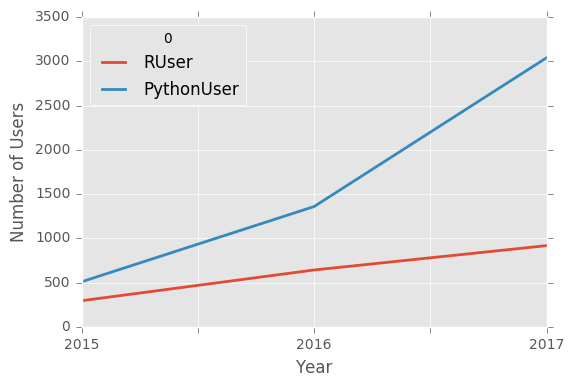

In [386]:
dfall['Year'] = dfall['Year'].astype(str)
dfall.groupby('Year')['RUser','PythonUser'].agg('sum').plot()
plt.style.use('ggplot')
plt.ylabel('Number of Users')

Data Scientists are increasingly using R and Python since 2015. Though, from this dataset, there are more respondants who use Python rather than R.

# ** Question - 7 **

In [413]:
dfall.groupby('Year')['Bachelors','Masters','PhD'].agg('sum')

,Bachelors,Masters,PhD
Year,,,
2015,256.0,260.0,122.0
2016,817.0,694.0,251.0
2017,3549.0,2794.0,671.0


We can see that the number of respondants who are Data Scientists, having a Master's or PhD has increased almost 900% and 450% respectively. Let's also calculate the perentage of Masters and PhD with respect to the total, to get a clear picture.

In [417]:
def PercentOfTotal(s):
    return (s.sum()/s.count()) * 100

In [419]:
dfall.groupby('Year')['Bachelors','Masters','PhD'].agg(['sum',PercentOfTotal])

Bachelors                Masters                   PhD               
           sum PercentOfTotal     sum PercentOfTotal    sum PercentOfTotal
Year                                                                      
2015     256.0      25.147348   260.0      25.540275  122.0      11.984283
2016     817.0      30.092081   694.0      25.561694  251.0       9.244936
2017    3549.0      39.984227  2794.0      31.478143  671.0       7.559712

Here, we can see that a higher % of Data Scientists hold a Bachelors and Masters degree in 2017 compared to 2015. Though the real surprise is that the % of Data Scientists who hold a PhD has gone done from 11% in 2015 to 7% in 2017. One reason might be that employers are increasingly hiring more candidates with only a Bachelors or Masters degree to meet the demand for Data Scientists!

# ** Question - 8 **

In [422]:
dfall[dfall['Country'] == 'United States'].groupby('Year')['Salary'].agg(['median','mean'])

,median,mean
Year,,
2015,90000.0,96276.595745
2016,95000.0,100426.136364
2017,100000.0,100755.710787


The median salary for Data Scientists has grown at of rate of 5,000$ per year from 2015 in the United States.